#### 【 이산확률분포 (Discrete Distribution) 】
- 개념 및 특징
    - 셀 수 있는 확률변수의 확률값 분포
    - 각 값에 대해 P(X = x)정의
    - 확률의 합은 항상 1 ==>  ∑​P(X=x)=1

    - 예시: 동전 앞/뒤, 주사위 눈, 하루 고객 수, 고장 횟수
    - 그래프 : 막대그래프
    - 대표분포 : 베르누이, 이항, 포아송

[1] 베르누이 분포(Bernoulli Distribution)<hr>
- 결과가 두 가지뿐인 단 한 번의 실험(베르누이 시행)의 확률 분포 의미
- 확률변수 X ∈ {0, 1} 
- 확률
    - 성공(x=1)일 확률: p 
    - 실패(x=0)일 확률: 1-p
- 이항 분포의 특수한 사례

In [1]:
## 모듈 로딩 -------------------------------------
import random
from collections import Counter

## ----------------------------------------------
## 함수기능 : 성공확률 p인 베르누이 시행 1회
## 함수이름 : bernoulli_trial
## 반환결과 : 시행 결과
## ----------------------------------------------
def bernoulli_trial(p=0.3):
    # random.random() : 0~1 사이 난수
    return 1 if random.random() < p else 0

## ----------------------------------------------
## 10,000번 시행해보기
## ----------------------------------------------
p = 0.3             #- 성공확률
n = 10000           #- 시행횟수
results = [bernoulli_trial(p) for _ in range(n)]
cnt     = Counter(results)

print("0(실패) 횟수         :", cnt[0])
print("1(성공) 횟수         :", cnt[1])
print("실험에서의 성공 비율   :", cnt[1]/n)
print("이론상의 성공 확률 p   :", p)

0(실패) 횟수         : 6988
1(성공) 횟수         : 3012
실험에서의 성공 비율   : 0.3012
이론상의 성공 확률 p   : 0.3


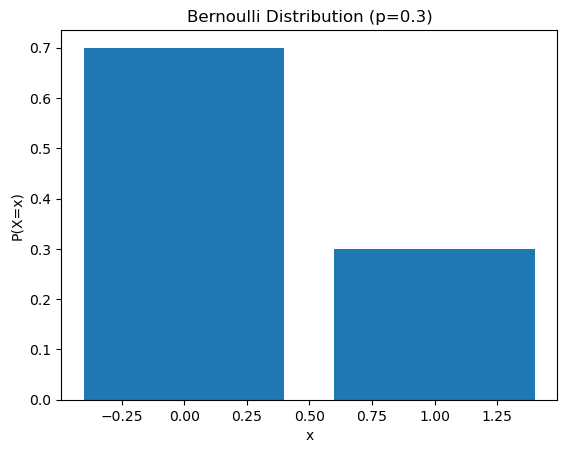

In [ ]:
## 모듈 로딩 -------------------------------------
import numpy as np
import matplotlib.pyplot as plt

## ----------------------------------------------
## 20번 시행해보기
## ----------------------------------------------
p   = 0.3
x   = [0, 1]
pmf = [1-p, p]    # [실패확률, 성공확률]

plt.bar(x, pmf)
plt.title("Bernoulli Distribution (p=0.3)")
plt.xlabel("x")
plt.ylabel("P(X=x)")
plt.show()

[2] 이항분포(Binomial Distribution)<hr>
- 성공확률 p인 베르누이 시행을 n번 반복했을 때, **성공의 횟수 분포**.
- 확률변수 X = n번 중 성공 횟수
- 기대값/평균:E[X]=np
- 분산 : Var(X)=np(1−p)
- 예시 : n번 클릭 중 클릭 성공 횟수,  시험에서 정답 맞친 개수 
- 확률 질량 함수 : K ~ B(n,p)  K - 확률변수, n - 시행횟수, p - 성공확률

In [3]:
## -------------------------------------------------------------
## 모듈 로딩
## -------------------------------------------------------------
import random
from collections import Counter
import numpy as np

## -------------------------------------------------------------
## 함수기능 : 이항분포에서 한 번의 샘플을 생성: n번 시행 중 성공 횟수
## 함수이름 : binomial_trial
## -------------------------------------------------------------
def binomial_trial(n=10, p=0.5):
    successes = 0
    for _ in range(n):
        if random.random() < p:
            successes += 1
    return successes

## -------------------------------------------------------------
## 시행
## -------------------------------------------------------------
n, p = 10, 0.5
num_samples = 10000
samples = [binomial_trial(n, p) for _ in range(num_samples)]

cnt = Counter(samples)
print("성공 횟수별 빈도:")
for k in range(0, n+1):
    print(k, "회 성공:", cnt[k])

print("\n실험 평균:", np.mean(samples))
print("이론 평균 (np):", n*p)

성공 횟수별 빈도:
0 회 성공: 8
1 회 성공: 113
2 회 성공: 454
3 회 성공: 1199
4 회 성공: 2004
5 회 성공: 2458
6 회 성공: 2009
7 회 성공: 1170
8 회 성공: 469
9 회 성공: 104
10 회 성공: 12

실험 평균: 4.9976
이론 평균 (np): 5.0


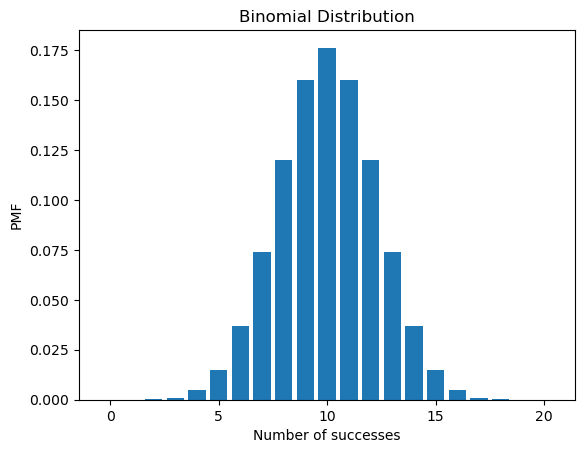

In [7]:
## 모듈 로딩
from scipy.stats import binom
import numpy as np
import matplotlib.pyplot as plt

## 변수들
n, p = 20, 0.5              ##- 시행횟수, 성공 확률
x   = np.arange(0, n+1)     ##- 데이터
pmf = binom.pmf(x, n, p)    ##- 확률질량함수 X ~ B(n, p)

plt.bar(x, pmf)
plt.title("Binomial Distribution")
plt.xlabel("Number of successes")
plt.ylabel("PMF")
plt.show()


[3] 포아송 분포 (Poisson) - 횟수 모델링하는 분포<hr>
- 이산확률분포 중 가장 중요한 분포 중 하나
- 현실 세계 모든 분야(산업·의학·교통·서버·콜센터·품질관리 등)에서 매우 많이 사용
- 희귀 사건(rare event) 분석에 최적

- 어떤 사건이 일정한 시간·공간에서 몇 번 발생하는지 나타내는 확률분포
- 파라미터 λ (람다): 평균 발생 횟수
    * 1분당 평균 3통 전화 → λ=3
    * 하루 평균 사고 2번 → λ=2
    * 웹 서버 초당 요청 10건 → λ=10
- 특징
    * 확률변수 X = 단위 시간/공간 안에서의 사건 발생 수
    * 기대값/평균 = 분산 : E[X]=Var(X)=λ 
    * 오른쪽으로 약간 치우친 형태로 정규분포 아님
    * λ이 커지면 정규분포처럼 보임 : Poisson(λ)≈Normal(λ,λ)
- 예
    * 1시간 동안 콜센터에 걸려오는 전화 수
    * 하루 동안 발생하는 서버 장애 수
    * 1km 도로 구간에서 교통사고 발생 수

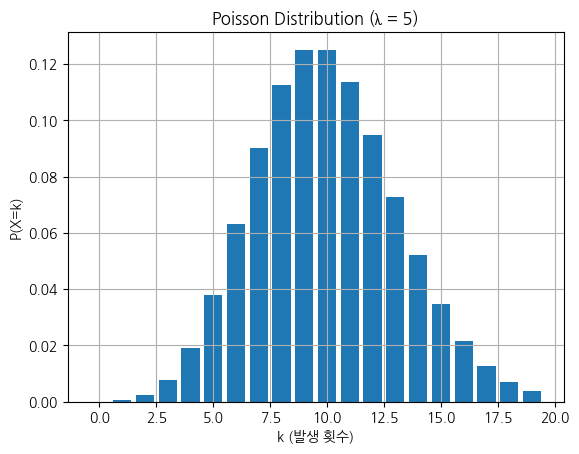

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import koreanize_matplotlib
from scipy.stats import poisson

lam = 10  # 평균 발생 횟수
x   = np.arange(0, 20)  # 0~19까지 발생 가능

pmf = poisson.pmf(x, lam)

plt.bar(x, pmf)
plt.title("Poisson Distribution (λ = 5)")
plt.xlabel("k (발생 횟수)")
plt.ylabel("P(X=k)")
plt.grid(True)
plt.show()

In [10]:
import numpy as np

lam = 5
N = 10000

samples = np.random.poisson(lam, size=N)

print("실험 평균:", np.mean(samples))
print("이론 평균 λ:", lam)

print("실험 분산:", np.var(samples))
print("이론 분산 λ:", lam)


실험 평균: 4.9871
이론 평균 λ: 5
실험 분산: 5.0563335899999995
이론 분산 λ: 5


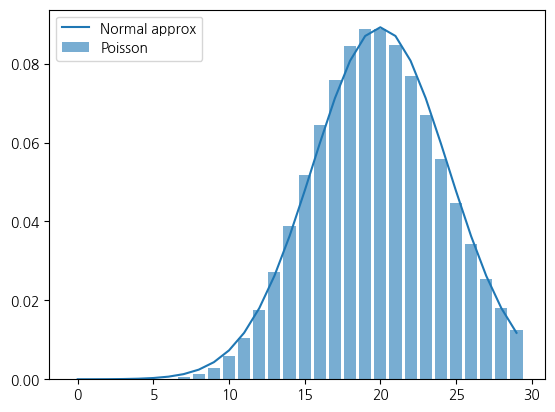

In [11]:
from scipy.stats import norm

x = np.arange(0, 30)
lam = 20

plt.bar(x, poisson.pmf(x, lam), alpha=0.6, label='Poisson')
plt.plot(x, norm.pdf(x, lam, np.sqrt(lam)), label='Normal approx')
plt.legend()
plt.show()

In [11]:
import numpy as np
from collections import Counter

lam = 3  # 평균 발생 횟수
num_samples = 10000

# numpy의 poisson 샘플링
samples = np.random.poisson(lam=lam, size=num_samples)

cnt = Counter(samples)
print("발생 횟수별 빈도:")
for k in range(0, 10):
    print(f"{k}회 발생:", cnt[k])

print("\n실험 평균:", np.mean(samples))
print("이론 평균 λ:", lam)

발생 횟수별 빈도:
0회 발생: 506
1회 발생: 1422
2회 발생: 2267
3회 발생: 2338
4회 발생: 1629
5회 발생: 1012
6회 발생: 528
7회 발생: 194
8회 발생: 59
9회 발생: 29

실험 평균: 2.9969
이론 평균 λ: 3


In [ ]:
## ----------------------------------------------
## 이산확률분포의 공통점
## ----------------------------------------------
## 1. 값이 여러 개지만 셀 수 있는 값들
##    -> 0,1,2,…
##    -> 1,2,3,4,5,6
##
## 2. 각 값마다 확률이 붙어 있음
##    𝑃(𝑋=𝑥1), 𝑃(𝑋=𝑥2), ... , 
##
## 3. 모든 확률의 합은 항상 1
##    ∑𝑃(𝑋=𝑥)=1
## 
## 4. 평균(기댓값), 분산으로 분포의 특성을 요약할 수 있음
##    -> 동전: E[X]   = p,   Var(X) = p(1-p)
##    -> 이항: E[X]   = np, Var(X) = np(1-p)    : 성공횟수에 대한 분포
##    -> 포아송: E[X] = λ, Var(X) = λ           : 횟수에 대한 분포
## ----------------------------------------------